# Factor Analysis & Clustering

# <center> Hitter </center>
<img src="https://www.ducksters.com/sports/baseball/hitter.jpg">

## Data importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
team_hit_2016 = pd.read_csv('team_hitter_scaling_2016.csv',index_col=0)
team_pit_2016 = pd.read_csv('team_pitcher_scaling_2016.csv',index_col=0)
team_hit_2016 = pd.merge(team_hit_2016,team_pit_2016[['G_ID','WLS','TB_SC']], on=['G_ID','TB_SC'])

Factor Analysis(FA)는 잠재변수를 찾는 방식이다. 잠재변수에 의해 X변수들이 결정된다고 가정한다. 순서는 다음과 같다.

1) **Choosing the Number of Factors**(Kaiser criterion & scree plot): <br>
고유값에 근거하여 적절한 요인의 개수를 판단 <br>
2) **Factor Analysis**: <br>
factor analysis를 통하여 factor가 어느 변수와 high factor loadings을 갖는지 살펴야함.

[참조](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)

## Choosing the Number of Factors

In [3]:
features = ['RUN','P_HRA_RT','AVG','SLG','IsoP','OBP','OPS','RC','XR','wOBA','BABIP']
df = team_hit_2016.loc[:,features]
# Target y는 WLS로 설정한다.

In [4]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(df, 10, rotation='varimax')
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.817098e+00
1,2.942385e+00
2,1.096772e+00
3,6.167916e-01
4,3.007768e-01
5,1.051879e-01
6,9.986562e-02
7,1.378441e-02
8,7.338156e-03
9,1.627527e-15


Kaiser Criterion에 의하여 고유값이 1보다 큰 경우만 factor로 취급한다. <br>
따라서 이 경우에는 factor의 갯수를 3개로 두자.

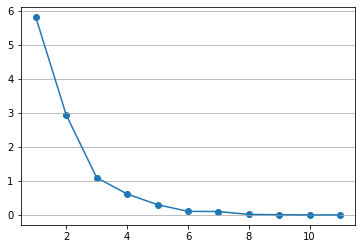

In [5]:
plt.scatter(range(1, df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.grid(axis='y')
plt.show() #Factor가 3개일때만 1을 넘는다. -> 

## Factor Analysis

In [6]:
fa.analyze(df, 3, rotation="varimax")
#각 loading 값들이 최대한 서로 다르게 하기위해 Varimax rotation 실행.

In [7]:
fa.loadings #factor loading = L, 이며 L은 factor간 선형결합의 weight를 의미함.
# L을 추정하는것이 중요한데 

,Factor1,Factor2,Factor3
RUN,0.077808,0.952707,0.065389
P_HRA_RT,0.062466,0.581165,0.023765
AVG,0.915420,0.097015,0.333502
SLG,0.529269,0.090509,0.829665
IsoP,0.140895,0.065781,0.987944
OBP,0.820440,0.112283,0.361162
OPS,0.683132,0.103050,0.724890
RC,0.086954,0.953603,0.071237
XR,0.088626,0.953898,0.085399
wOBA,0.747518,0.104598,0.639739


**F1(타율,출루계열)** : AVG, OBP, wOBA, BABIP <br>
AVG(타율), OBP(출루율), wOBA(가중 출루율), BABIP

**F2(득점계열)** : RUN, P_HRA_RT, RC, XR <br>
RUN(득점), P_HHA_RT(득점권타율), RC(득점기여도), XR(득점 공헌도)

**F3(장타율계열)** : SLG, IsoP, OPS <br>
SLG(장타율), IsoP(순장타율), ops(출루율+장타율)

In [8]:
fa.get_factor_variance()
# Total 86% cumulative Variance explained by the 3 factors.

,Factor1,Factor2,Factor3
SS Loadings,3.518986,3.126468,2.858742
Proportion Var,0.319908,0.284224,0.259886
Cumulative Var,0.319908,0.604132,0.864018


In [9]:
X = df.values
fa = FactorAnalysis(n_components=3)
X_fa = fa.fit_transform(X) # FA를 위해 E(X-mu)=0를 만들어주려고 mu를 빼주는듯?
df_fa =pd.DataFrame(data=X_fa, columns=['hit_f1','hit_f2','hit_f3'])
df_fa['WLS'] = team_hit_2016['WLS']
df_fa['G_ID'] = team_hit_2016['G_ID']
df_fa['T_ID'] = team_hit_2016['T_ID']
df_fa['TB_SC'] = team_hit_2016['TB_SC']

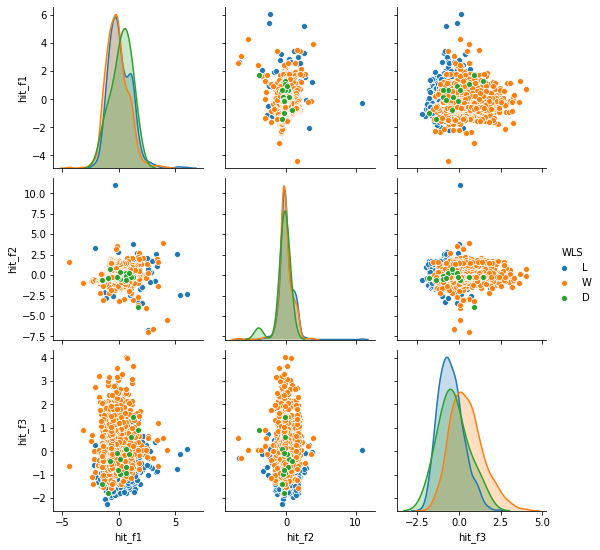

In [10]:
sns.pairplot(data=df_fa, hue='WLS')

In [11]:
from mpl_toolkits import mplot3d

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=3).fit(df_fa[['hit_f1','hit_f2','hit_f3']])

In [14]:
df_fa['cluster_hit'] = kmeans.labels_

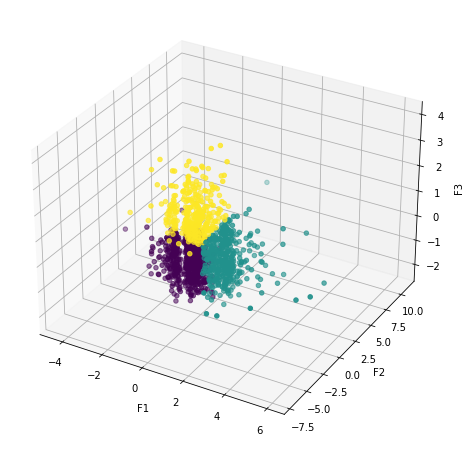

In [15]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df_fa['hit_f1'],df_fa['hit_f2'],df_fa['hit_f3'],c=df_fa['cluster_hit'])
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3',rotation=90)
plt.show()

# <center> Pitcher </center>
<img src="http://sportsgroundproduction.blob.core.windows.net/cms/14732/newsarticles/63254_wo.jpg" width="220">

In [16]:
team_pit_2016.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,OOPS,WHIP,BABIP,DICE,ERA,RA9,FIP,kFIP,HR/9,H/9
0,20160401HHLG0,20160401,LG,HH,0,B,0,W,0,36,...,0.652618,0.294171,0.361111,0.000000,0.375000,0.285714,0.000000,0.000000,0.000000,0.559211
1,20160401HHLG0,20160401,HH,LG,0,T,0,L,0,34,...,0.615942,0.047586,0.266667,0.264158,0.397059,0.424370,0.264158,0.324661,0.352941,0.171053
2,20160401HTNC0,20160401,NC,HT,0,B,0,W,0,27,...,0.727554,0.147085,0.304348,0.329193,0.500000,0.428571,0.329193,0.429487,0.444444,0.298246
3,20160401HTNC0,20160401,HT,NC,0,T,0,L,0,24,...,0.966667,0.845741,0.368421,0.847826,0.703125,0.660714,0.847826,1.000000,1.000000,0.615132
4,20160401KTSK0,20160401,SK,KT,0,B,0,L,0,27,...,0.853175,0.735427,0.321429,0.875776,1.000000,1.000000,0.875776,0.942308,0.888889,0.745614


In [17]:
features = ['R','ER','P_WHIP_RT','K/9','BB/9','K/BB','OAVG','OOBP','OSLG','OOPS','WHIP','BABIP','DICE',
                                               'ERA','RA9','FIP','kFIP','HR/9','H/9']
df = team_pit_2016.loc[:,features]

In [18]:
fa = FactorAnalyzer()
fa.analyze(df, 10, rotation='varimax')
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.076674e+01
1,2.495332e+00
2,2.269857e+00
3,1.455092e+00
4,1.071220e+00
5,4.891925e-01
6,2.103467e-01
7,1.006515e-01
8,5.165493e-02
9,4.110243e-02


<function matplotlib.pyplot.show(close=None, block=None)>

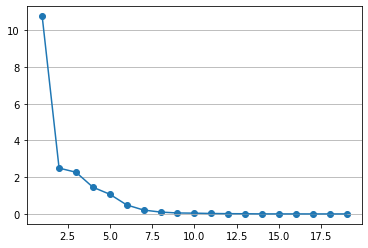

In [19]:
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1),ev)
plt.grid(axis='y')
plt.show # 4개 선택

In [20]:
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3,Factor4
R,0.092618,0.084737,0.970259,0.026750
ER,0.087012,0.092220,0.969865,0.015046
P_WHIP_RT,0.015054,0.056321,0.617532,0.077854
K/9,-0.318749,-0.279693,0.018006,0.168571
BB/9,0.306014,0.049820,0.071565,0.958276
K/BB,-0.547522,-0.248502,-0.048560,-0.515618
OAVG,0.286590,0.950108,0.080329,0.051397
OOBP,0.365895,0.669575,0.106607,0.630400
OSLG,0.684225,0.678878,0.095199,-0.026865
OOPS,0.623199,0.732532,0.106869,0.212123


F1 : K/9, K/BB, OSLG, DICE, FIP, kFIP, HR/9
9이닝당 탈삼진개수, 볼삼비, 피장타율, 유사 평군자책점,
수비무관평균자책점, 한국프로야구의 수비무관평균자책점,
9이닝당 피홈런개수

F2 : OAVG, OOBP, OOPS, WHIP, BABIP, ERA, RA9, H/9
피안타율, 피출루율, 피OPS, 이닝 당 출루허용, 인플레이 타구 피안타율,
평균자책점, 9이닝당평균실점, 9이닝당 피안타개수

F3 : R, ER, P_WHIP_RT
실점, 자책점, 득점권WHIP

F4 : BB/9
9이닝당 볼넷개수

In [21]:
fa.get_factor_variance()
# Total 87% cumulative Variance explained by the 4 factors.

,Factor1,Factor2,Factor3,Factor4
SS Loadings,5.764750,5.503591,2.388449,2.869246
Proportion Var,0.303408,0.289663,0.125708,0.151013
Cumulative Var,0.303408,0.593071,0.718778,0.869791


In [22]:
X = df.values
fa = FactorAnalysis(n_components=4)
X_fa = fa.fit_transform(X) # FA를 위해 E(X-mu)=0를 만들어주려고 mu를 빼주는듯?
df2_fa =pd.DataFrame(data=X_fa, columns=['pit_f1','pit_f2','pit_f3','pit_f4'])
df2_fa['WLS'] = team_pit_2016['WLS']
df2_fa['G_ID'] = team_pit_2016['G_ID']
df2_fa['T_ID'] = team_pit_2016['T_ID']
df2_fa['TB_SC'] = team_pit_2016['TB_SC']
kmeans = KMeans(n_clusters=3).fit(df2_fa[['pit_f1','pit_f2','pit_f3','pit_f4']])
df2_fa['cluster_pit'] = kmeans.labels_

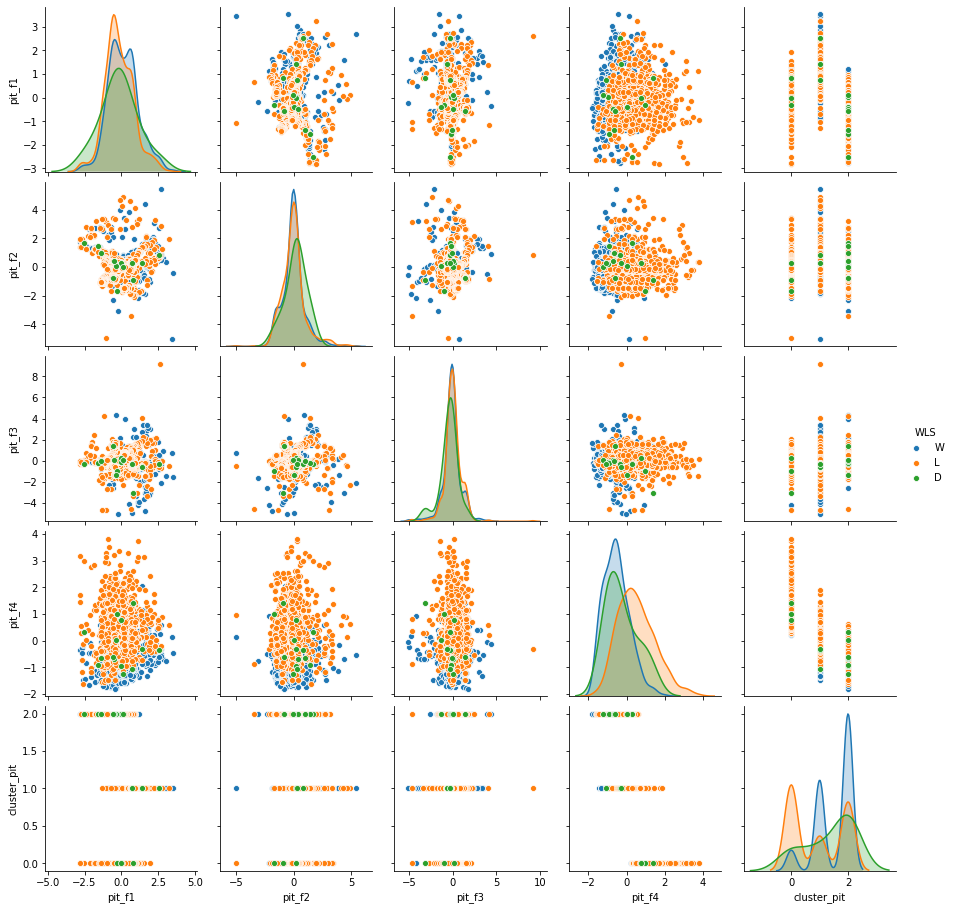

In [23]:
sns.pairplot(data=df2_fa, hue='WLS')

## K-means clustering

In [24]:
final_fa = pd.merge(df_fa,df2_fa, on=['G_ID','T_ID','TB_SC','WLS'])

In [44]:
kmeans = KMeans(n_clusters=3).fit(final_fa[['hit_f1','hit_f2','hit_f3','pit_f1','pit_f2','pit_f3','pit_f4']])
final_fa['cluster_play'] = kmeans.labels_

In [45]:
cross_play = pd.crosstab(final_fa['cluster_play'],final_fa['T_ID'])
cross_play

T_ID,HH,HT,KT,LG,LT,NC,OB,SK,SS,WO
cluster_play,,,,,,,,,,
0,135,0,127,129,137,0,0,0,141,18
1,0,129,5,11,2,116,143,14,2,126
2,9,15,12,4,5,28,1,130,1,0


In [55]:
cross_hit = pd.crosstab(final_fa['cluster_hit'],final_fa['T_ID'])
cross_pit = pd.crosstab(final_fa['cluster_pit'],final_fa['T_ID'])

def cluster_max(crosstable,name):
    cluster_team = crosstable.apply(lambda x: np.where(x==max(x)))
    cluster_team = cluster_team.apply(lambda x: int(sum(x)))
    cluster_team = pd.DataFrame(cluster_team)
    cluster_team = cluster_team.reset_index()
    cluster_team.columns = ['T_ID',name]
    return(cluster_team)

In [63]:
cluster = pd.merge(final_fa, cluster_max(cross_hit,'cluster_team_hit'),on='T_ID')
cluster = pd.merge(cluster, cluster_max(cross_pit,'cluster_team_pit'),on='T_ID')

In [70]:
cluster = cluster[['G_ID','T_ID','TB_SC','WLS','cluster_team_hit','cluster_team_pit','hit_f1','hit_f2','hit_f3','pit_f1','pit_f2','pit_f3','pit_f4']]

In [71]:
cluster

,G_ID,T_ID,TB_SC,WLS,cluster_team_hit,cluster_team_pit,hit_f1,hit_f2,hit_f3,pit_f1,pit_f2,pit_f3,pit_f4
0,20160401HHLG0,HH,T,L,1,2,3.246649,-0.672442,0.381691,3.257575,1.922055,-0.487703,0.570372
1,20160402HHLG0,HH,T,L,1,2,1.916625,-1.703314,0.501447,-0.109634,2.675800,-1.352436,0.990402
2,20160405WOHH0,HH,B,W,1,2,0.486276,-2.875870,0.584646,-0.112498,3.966649,-1.334058,-0.153833
3,20160406WOHH0,HH,B,L,1,2,-0.270843,-0.113845,-0.067797,0.104077,4.892921,-2.322669,0.605231
4,20160407WOHH0,HH,B,L,1,2,-0.529489,1.215862,0.112625,0.576330,4.565678,-0.419101,0.877013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20161002WOHH0,WO,T,W,0,2,-0.645937,-0.231313,0.132877,0.222401,-1.466630,0.493520,-1.328507
1436,20161004WONC0,WO,T,W,0,2,-0.589119,-0.210641,-1.397240,0.249886,-1.428621,0.463422,-1.281861
1437,20161005WONC0,WO,T,L,0,2,-0.561307,-0.141257,-1.052146,0.222655,-1.452556,0.563749,0.701578
1438,20161007WOLT0,WO,T,L,0,2,-0.531050,-0.165154,-0.797167,0.215760,-1.471382,0.534270,-0.169690


In [73]:
cluster.to_csv('cluster.csv')